# Separate Testing Dataset

In [6]:
import os
import pandas as pd
import shutil
from paths import rend_pic_dir

In [7]:
# paths
home_dir = "/home/ldlmdl/"
spec_dir = home_dir + "spec/"
non_dir = spec_dir + "non/"
guide_path = home_dir + "guide.xlsx"
test_guide_path = home_dir + "test_guide.xlsx"

rend_src_path = rend_pic_dir + "Cynthia_full/"
rend_dest_path = spec_dir + "rend/"

In [8]:
sign_names = []

# Iterate through the files in the directory
for filename in os.listdir(non_dir):
    if filename.endswith("_Right.html"):
        sign_name = filename[:-11]  # Remove "_Right.html"
        sign_names.append(sign_name)

In [9]:
len(sign_names)

98

In [5]:
guide_df = pd.read_excel(guide_path)
filtered_df = guide_df[guide_df['NewFileName'].isin(sign_names)]
filtered_df.to_excel(test_guide_path, index=False)

In [10]:
for sign_name in sign_names:
    source_subdirectory = os.path.join(rend_src_path, sign_name)
    if os.path.exists(source_subdirectory) and os.path.isdir(source_subdirectory):
        destination_subdirectory = os.path.join(rend_dest_path, sign_name)
        shutil.copytree(source_subdirectory, destination_subdirectory)
        print(f"Copied '{sign_name}' to '{destination_subdirectory}'")


Copied 'HKSL_lesson_only92-TREE-0QHP-555' to '/home/ldlmdl/spec/rend/HKSL_lesson_only92-TREE-0QHP-555'
Copied 'HKSL_lesson_only496-INSTINCT-0TNK-976' to '/home/ldlmdl/spec/rend/HKSL_lesson_only496-INSTINCT-0TNK-976'
Copied 'HKSL_lesson_only481-STINGY-0MR4-960' to '/home/ldlmdl/spec/rend/HKSL_lesson_only481-STINGY-0MR4-960'
Copied 'HKSL_lesson_only484-LUSTFUL-0MBT-963' to '/home/ldlmdl/spec/rend/HKSL_lesson_only484-LUSTFUL-0MBT-963'
Copied 'HKSL_lesson_only65-SHOPPING-137S-528' to '/home/ldlmdl/spec/rend/HKSL_lesson_only65-SHOPPING-137S-528'
Copied 'HKSL_lesson_only82-PLAY_VIDEO_GAME-0ST9-545' to '/home/ldlmdl/spec/rend/HKSL_lesson_only82-PLAY_VIDEO_GAME-0ST9-545'
Copied 'HKSL_lesson_only48-TOMORROW-0PGE-510' to '/home/ldlmdl/spec/rend/HKSL_lesson_only48-TOMORROW-0PGE-510'
Copied 'HKSL_lesson_only87-TO_LIKE-0LCS-550' to '/home/ldlmdl/spec/rend/HKSL_lesson_only87-TO_LIKE-0LCS-550'
Copied 'HKSL_lesson_only70-SQUASH-0M61-533' to '/home/ldlmdl/spec/rend/HKSL_lesson_only70-SQUASH-0M61-533'
C

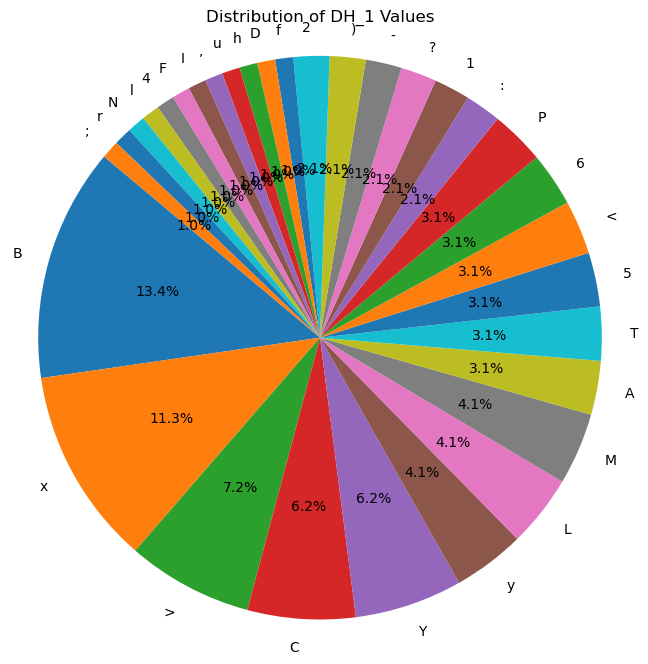

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_chart_from_excel(file_path):
    try:
        # Load the Excel file into a Pandas DataFrame
        df = pd.read_excel(file_path)

        # Check if the "DH_1" column exists in the DataFrame
        if 'DH_1' not in df.columns:
            raise ValueError("The 'DH_1' column does not exist in the Excel file.")

        # Calculate the value counts for the "DH_1" column
        value_counts = df['DH_1'].value_counts()

        # Create a pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title('Distribution of DH_1 Values')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

plot_pie_chart_from_excel(test_guide_path)
